In [ ]:
pip install opencv-python

<h3 align="center">Task N1 - NN training with torch</h3>

- **Fully connected neural networks** are the foundation of deep learning models. Able to learn any function they are powerful estimators. While it's easy to build and train neural network, debugging it becomes harder and harder more complex the network becomes. Forward and backward pass might run but there could be some other mathematical error which keeps network from learning.

- To get the dataset use the code below:
```
import pandas as pd
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(url, header=None, names=col_names)
```

- Your task is to train a binary classification network with binary cross entropy loss for predicting diabetes. Train your network with torch and with pytorch-lightning, explain your findings, reason around the network's performance, try different hyperparameters/network architecture setups

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import cv2

# Load and preprocess the dataset
col_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(url, header=None, names=col_names)

Train and test data split.

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

Handle missing values using training data statistics.

In [ ]:
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median_value = train_data[column].replace(0, np.nan).median()
    train_data[column] = train_data[column].replace(0, median_value)
    test_data[column] = test_data[column].replace(0, median_value)

Normalize features using training data statistics.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.iloc[:, :-1])
X_test = scaler.transform(test_data.iloc[:, :-1])
y_train = train_data.iloc[:, -1].values
y_test = test_data.iloc[:, -1].values

Convert to tensors.

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

Create datasets and loaders.

In [ ]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

Define the network using PyTorch.



In [ ]:
input_size = X_train_tensor.shape[1]
fc1 = nn.Linear(input_size, 64)
fc2 = nn.Linear(64, 32)
fc3 = nn.Linear(32, 1)
relu = nn.ReLU()
sigmoid = nn.Sigmoid()

Forward function.

In [ ]:
def forward(x):
    x = relu(fc1(x))
    x = relu(fc2(x))
    x = sigmoid(fc3(x))
    return x

Evaluate function.

In [ ]:
def evaluate_model(data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = forward(inputs)
            predicted = (outputs > 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")

Train the network using PyTorch.

In [ ]:
def train_with_torch():
    criterion = nn.BCELoss()
    optimizer = optim.Adam(list(fc1.parameters()) + list(fc2.parameters()) + list(fc3.parameters()), lr=0.001)

    epochs = 20
    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in train_loader:
            outputs = forward(inputs)
            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

    print("Evaluating on test data:")
    evaluate_model(test_loader)

Execute the training with PyTorch.

In [ ]:
train_with_torch()

Epoch 1/20, Loss: 0.6506
Epoch 2/20, Loss: 0.5938
Epoch 3/20, Loss: 0.5266
Epoch 4/20, Loss: 0.4829
Epoch 5/20, Loss: 0.4642
Epoch 6/20, Loss: 0.4477
Epoch 7/20, Loss: 0.4436
Epoch 8/20, Loss: 0.4331
Epoch 9/20, Loss: 0.4274
Epoch 10/20, Loss: 0.4340
Epoch 11/20, Loss: 0.4148
Epoch 12/20, Loss: 0.4130
Epoch 13/20, Loss: 0.4134
Epoch 14/20, Loss: 0.4089
Epoch 15/20, Loss: 0.4241
Epoch 16/20, Loss: 0.3969
Epoch 17/20, Loss: 0.4027
Epoch 18/20, Loss: 0.3993
Epoch 19/20, Loss: 0.3957
Epoch 20/20, Loss: 0.4017
Evaluating on test data:
Accuracy: 75.97%


Accuracy: 75.97%

<h3 align="center">Task N2.1 - 1D Convolution operation</h3>

- **Convolution** is an operation when we have 2 functions and by merging them together we get a third function. For images, first "function" is the pixel values of the image and the second "function" is the filter itself. For 1D data(Like time-series or text) we have 1D Convolution kernels, for 2D/3D data we have appropriate kernels as well

- For time series data we can see on the below image how convolution operation is done on 1D data. It is often used for denoising the data. For example you can use an averaging kernel( 1/n, 1/n ... 1/n ) for denoising. Explain what tradeoff is between using large kernels and smaller kernels by observing the outputs.

![Image alt text](https://i.stack.imgur.com/WNIXd.png)

- Your task is to build a sliding window 1D convolution on a sine function with some noise added to it. Below you can see the code for initializing it and plotting the noisy data. Your task is to denoise the `noisy_signal` variable. Write a function which will take in the `noisy_signal` and denoise it with 1D convolution.
```
N = 1000  # Number of data points
t = np.linspace(0, 4*np.pi, N)  # Time variable
clean_signal = np.sin(t)  # Clean sin function
noise = np.random.normal(0, 0.5, N)
noisy_signal = clean_signal + noise
plt.plot(t, noisy_signal)
plt.title('Noisy Signal')
plt.show()
```

In [ ]:
def generate_noisy_signal(N=1000):
    t = np.linspace(0, 4 * np.pi, N)  # Time variable
    clean_signal = np.sin(t)  # Clean sine function
    noise = np.random.normal(0, 0.5, N)  # Add noise
    noisy_signal = clean_signal + noise
    return t, clean_signal, noisy_signal

In [ ]:
def convolve_1d(signal, kernel):
    kernel_size = len(kernel)
    padding = kernel_size // 2
    padded_signal = np.pad(signal, (padding, padding), mode='constant', constant_values=0)
    convolved_signal = np.zeros_like(signal)

    for i in range(len(signal)):
        convolved_signal[i] = np.sum(padded_signal[i:i + kernel_size] * kernel)
    return convolved_signal

In [ ]:
def plot_results(t, noisy_signal, denoised_signals, kernel_sizes):
    plt.figure(figsize=(12, 8))
    plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.6)
    for i, denoised_signal in enumerate(denoised_signals):
        plt.plot(t, denoised_signal, label=f'Denoised (Kernel Size={kernel_sizes[i]})')
    plt.legend()
    plt.title('Denoising with 1D Convolution')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

In [ ]:
# Step 4: Trade-off explanation
def explain_kernel_tradeoff():
    print("Trade-off between kernel sizes:")
    print("- Small kernels preserve sharp features but may not denoise effectively.")
    print("- Large kernels smooth the signal more but can overly blur the signal and reduce details.")

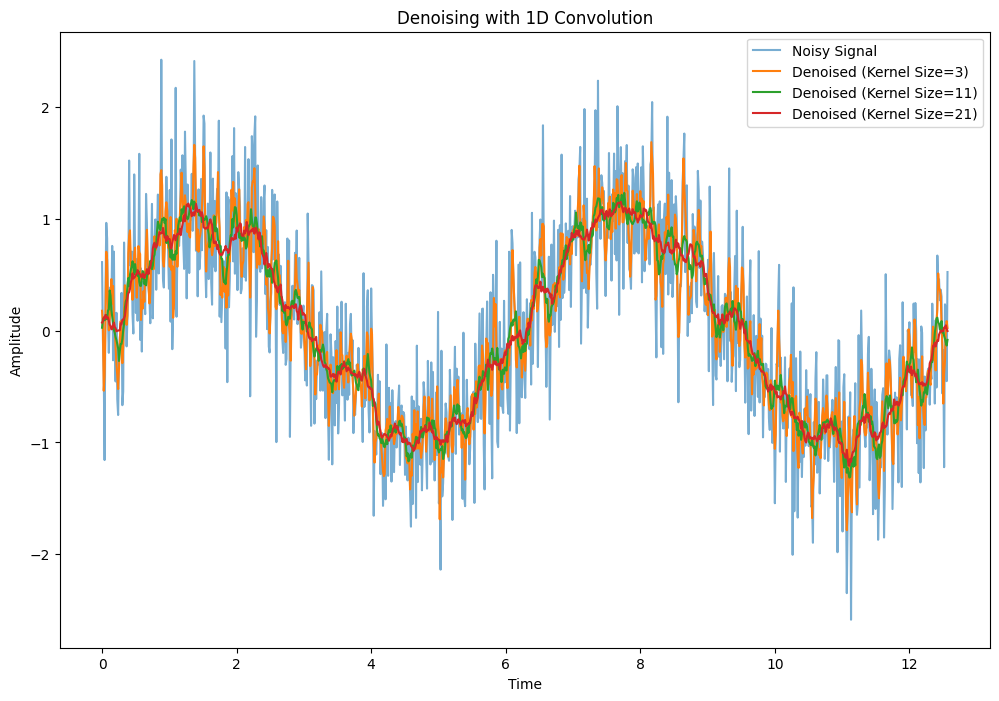

Trade-off between kernel sizes:
- Small kernels preserve sharp features but may not denoise effectively.
- Large kernels smooth the signal more but can overly blur the signal and reduce details.


In [ ]:
# Generate noisy signal
t, clean_signal, noisy_signal = generate_noisy_signal()

# Define kernel sizes and corresponding averaging kernels
kernel_sizes = [3, 11, 21]
kernels = [np.ones(k) / k for k in kernel_sizes]

# Denoise using 1D convolution
denoised_signals = [convolve_1d(noisy_signal, kernel) for kernel in kernels]

# Plot results
plot_results(t, noisy_signal, denoised_signals, kernel_sizes)

# Explain trade-offs
explain_kernel_tradeoff()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initialize noisy sine wave signal
def generate_noisy_signal(N=1000):
    t = np.linspace(0, 4 * np.pi, N)  # Time variable
    clean_signal = np.sin(t)  # Clean sine function
    noise = np.random.normal(0, 0.5, N)  # Add noise
    noisy_signal = clean_signal + noise
    return t, clean_signal, noisy_signal

# Step 2: 1D convolution function for denoising
def convolve_1d(signal, kernel):
    kernel_size = len(kernel)
    padding = kernel_size // 2
    padded_signal = np.pad(signal, (padding, padding), mode='constant', constant_values=0)
    convolved_signal = np.zeros_like(signal)

    for i in range(len(signal)):
        convolved_signal[i] = np.sum(padded_signal[i:i + kernel_size] * kernel)
    return convolved_signal

# Step 3: Visualize results and analyze kernel size trade-offs
def plot_results(t, noisy_signal, denoised_signals, kernel_sizes):
    plt.figure(figsize=(12, 8))
    plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.6)
    for i, denoised_signal in enumerate(denoised_signals):
        plt.plot(t, denoised_signal, label=f'Denoised (Kernel Size={kernel_sizes[i]})')
    plt.legend()
    plt.title('Denoising with 1D Convolution')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

# Step 4: Trade-off explanation
def explain_kernel_tradeoff():
    print("Trade-off between kernel sizes:")
    print("- Small kernels preserve sharp features but may not denoise effectively.")
    print("- Large kernels smooth the signal more but can overly blur the signal and reduce details.")

# Main execution
if __name__ == "__main__":
    # Generate noisy signal
    t, clean_signal, noisy_signal = generate_noisy_signal()

    # Define kernel sizes and corresponding averaging kernels
    kernel_sizes = [3, 11, 21]
    kernels = [np.ones(k) / k for k in kernel_sizes]

    # Denoise using 1D convolution
    denoised_signals = [convolve_1d(noisy_signal, kernel) for kernel in kernels]

    # Plot results
    plot_results(t, noisy_signal, denoised_signals, kernel_sizes)

    # Explain trade-offs
    explain_kernel_tradeoff()

<h3 align="center">Task N2.2 - 2D Convolution operation</h3>

- In image processing **Convolution** filter/kernel is a $k \times k$ matrix which is used for retrieving useful features from the image. It is a fundamental building block of Convolutional neural networks(CNN)

- After applying the kernel over the image, we often get a downsampled feature map from the image as shown in the animation below:
  
<center><img src="https://drive.google.com/uc?export=view&id=153Aj-MSmLndc3dNhl9HvbpNZhDGlYB_I" alt="Example" /></center>


- Your job is to write a convolution operation as a function(without using packages like torch,tensorflow, keras etc.) which takes in image of shape (**CxHxW**, C - Channel(usually RGB), H - Height of the image, W - Width of the image) and get the output image after applying convolution like it's shown in the illustration. Keep dimensions of the image in mind, if kernel is larger than the image, 28x28 image let's say and user inputs kernel size of 30x30, then return an error. Implementing padding in this task is not needed.

- For testing the output you can use the **uniform blur** kernel for any image you like which is defined below:
  \begin{equation}
K = \frac{1}{9} \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
\end{equation}

- Try your function on grayscale images with Sobel Operator and explain the output:
\begin{equation}
K = \begin{bmatrix}
-1 & 0 &  1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
\end{equation}

In [ ]:
def convolve_2d(image, kernel):
    """
    Perform a 2D convolution operation on an image without padding.

    Parameters:
    - image: NumPy array of shape (C, H, W), where C is the number of channels.
    - kernel: 2D NumPy array of shape (k, k), the convolution kernel.

    Returns:
    - output: NumPy array of convolved image of shape (C, H-k+1, W-k+1).
    """

    if kernel.shape[0] != kernel.shape[1]:
        raise ValueError("Kernel must be square (k × k).")
    if kernel.shape[0] > image.shape[1] or kernel.shape[1] > image.shape[2]:
        raise ValueError("Kernel size cannot be larger than the image dimensions.")

    kernel = np.flipud(np.fliplr(kernel))  # Flip kernel for convolution
    C, H, W = image.shape
    k = kernel.shape[0]  # Kernel size

    output_height = H - k + 1
    output_width = W - k + 1

    output = np.zeros((C, output_height, output_width))

    # Perform convolution
    for c in range(C):
        for i in range(output_height):
            for j in range(output_width):
                region = image[c, i:i + k, j:j + k]
                output[c, i, j] = np.sum(region * kernel)

    return output

In [ ]:
def load_grayscale_image(filepath):
    """
    Load a grayscale image using OpenCV and return a NumPy array with a channel dimension.

    Parameters:
    - filepath: Path to the image file.

    Returns:
    - NumPy array of shape (1, H, W) for grayscale image.
    """
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    if image is None:
        raise ValueError(f"Image at path {filepath} could not be loaded. Check the file path.")
    return np.expand_dims(image, axis=0)

In [ ]:
# Uniform blur kernel
uniform_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

# Sobel operator for edge detection (horizontal edges)
sobel_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

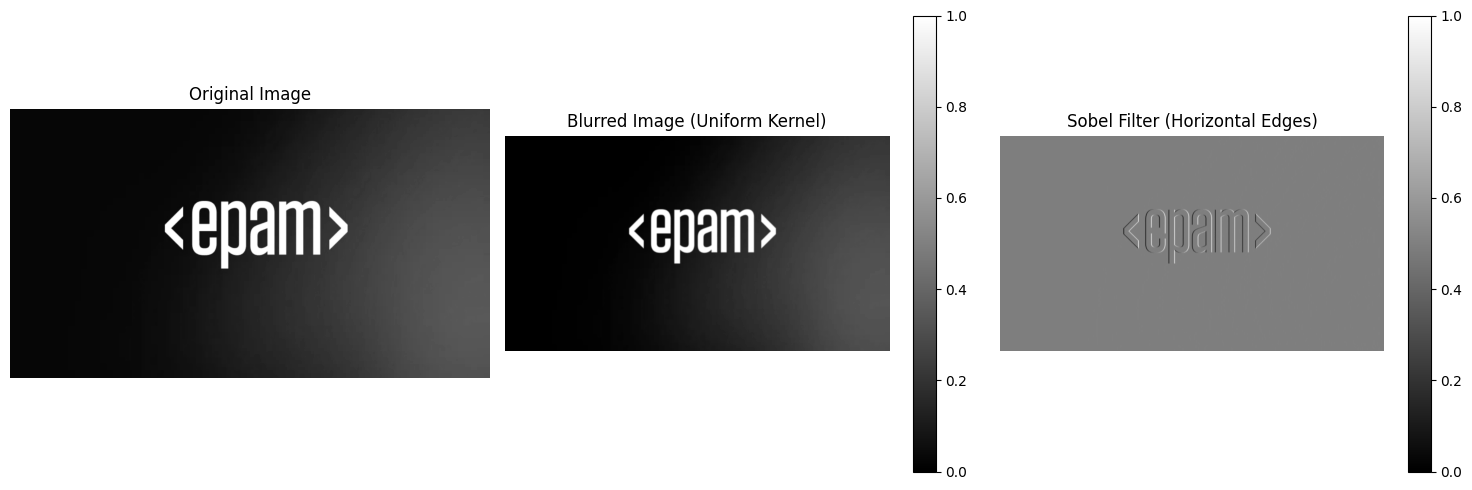

In [ ]:
filepath = "epam.jpeg"
image = load_grayscale_image(filepath)

blurred_image = convolve_2d(image, uniform_kernel)

sobel_image = convolve_2d(image, sobel_kernel)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image[0], cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(blurred_image[0], cmap='gray')
axes[1].set_title("Blurred Image (Uniform Kernel)")
axes[1].axis('off')
plt.colorbar(plt.cm.ScalarMappable(cmap='gray'), ax=axes[1])

axes[2].imshow(sobel_image[0], cmap='gray')
axes[2].set_title("Sobel Filter (Horizontal Edges)")
axes[2].axis('off')
plt.colorbar(plt.cm.ScalarMappable(cmap='gray'), ax=axes[2])

plt.tight_layout()
plt.show()